In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR.csv')

In [32]:
#основные статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
# мода
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#корреляционная матрица
df.iloc[:, 0:5].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Наиболее скоррелированными переменными являются average_montly_hours и number_project. Наименее скоррелированными переменными являются average_montly_hours и satisfaction_level.

In [29]:
#количество сотрудников по департаментам
df.groupby('department').count()['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

<AxesSubplot:>

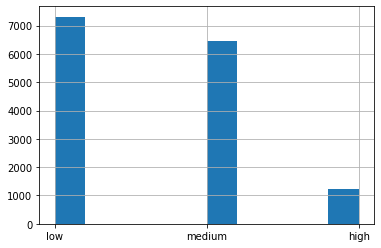

In [36]:
#распределение по зарплатам
df.salary.hist()

Большинство сотрудников получают низкие зарплаты, немного меньшее кол-во сотрудников получают средние зарплаты, высокие зарплаты получают лишь небольшое количество сотрудников

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [68]:
df_dep_salary =   df.pivot_table(
                        index='salary', 
                        columns='department', 
                        values='satisfaction_level', 
                        aggfunc='count')

In [69]:
df_dep_salary

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


IT


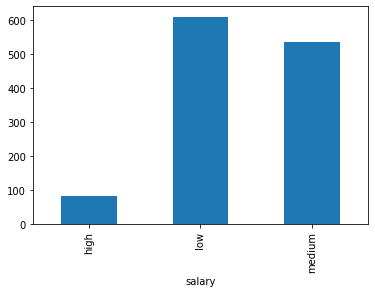

RandD


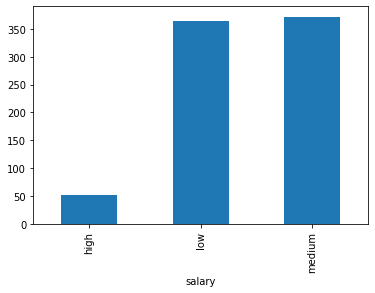

accounting


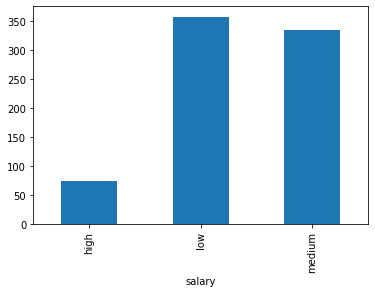

hr


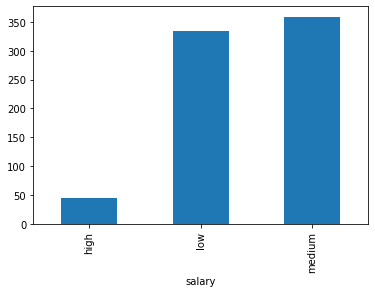

management


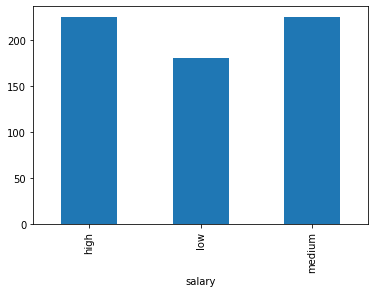

marketing


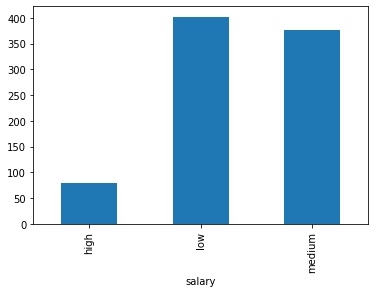

product_mng


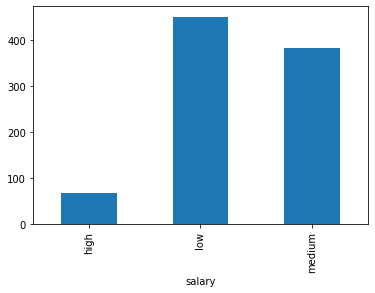

sales


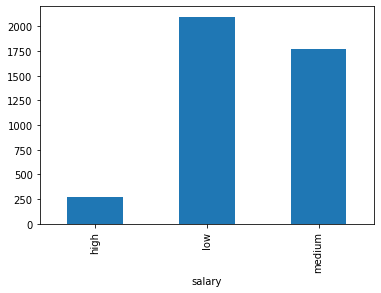

support


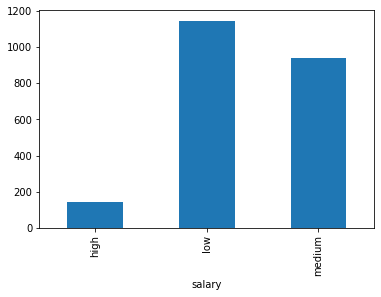

technical


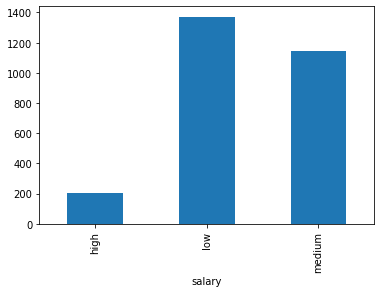

In [74]:
for dep in [x for x in df_dep_salary]:
    print(dep)
    df_dep_salary[dep].plot(kind='bar')
    plt.show()

проверка гипотезы, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

H0: сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом

H1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом 

In [109]:
highsalary_hours = df[df['salary']=='high']['average_montly_hours']
lowsalary_hours = df[df['salary']=='low']['average_montly_hours']

In [110]:
from scipy import stats as st

In [111]:
alpha = 0.05
result = st.ttest_ind(highsalary_hours, lowsalary_hours)

if  (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом')

Не отвергаем нулевую гипотезу, сотрудники с высоким окладом проводят на работе не больше времени, чем сотрудники с низким окладом


In [116]:
left = df[df['left']==1]
work = df[df['left']==0]

In [128]:
# доля сотрудников с повышением среди уволившихся
notpromoted, promoted = left['promotion_last_5years'].value_counts()
promoted / (notpromoted + promoted) * 100

0.5320638476617194

In [132]:
# доля сотрудников с повышением среди не уволившихся сотрудников
notpromoted, promoted = work['promotion_last_5years'].value_counts()
promoted / (notpromoted + promoted) * 100

2.6251312565628284

In [135]:
# средняя степерь удовлетворенности уволившихся сотрудников
left.satisfaction_level.mean()

0.4400980117614114

In [136]:
# средняя степерь удовлетворенности не уволившихся сотрудников
work.satisfaction_level.mean()

0.666809590479524

In [141]:
# среднее ко-во проектов уволившихся сотрудников
left.number_project.mean()

3.8555026603192384

In [142]:
# среднее ко-во проектов не уволившихся сотрудников
work.number_project.mean()

3.786664333216661

Модель 

In [214]:
parameteres = df.iloc[:, [0,1,2,3,4,5,7]]
dismissal = df.iloc[:, 6]

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(parameteres, dismissal, test_size=0.3)

In [216]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [218]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.756

Модель сделала правильное предсказание в 75.6% случаев